<a href="https://colab.research.google.com/github/ihagoSantos/machine_learning/blob/main/decision_tree_continuous_attributes_sonar_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install pydotplus

In [18]:
!pip install dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 960.2 kB/s eta 0:00:00


In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [20]:
from google.colab import files
uploaded = files.upload()

Saving sonar.xlsx to sonar (1).xlsx


In [21]:
sonar = pd.read_excel('sonar.xlsx', sheet_name=0)
print("Dimensões: {0}".format(sonar.shape))
print("Campos: {0}".format(sonar.keys()))
print(sonar.describe, sep='\n')

Dimensões: (208, 61)
Campos: Index(['Atributo_1', 'Atributo_2', 'Atributo_3', 'Atributo_4', 'Atributo_5',
       'Atributo_6', 'Atributo_7', 'Atributo_8', 'Atributo_9', 'Atributo_10',
       'Atributo_11', 'Atributo_12', 'Atributo_13', 'Atributo_14',
       'Atributo_15', 'Atributo_16', 'Atributo_17', 'Atributo_18',
       'Atributo_19', 'Atributo_20', 'Atributo_21', 'Atributo_22',
       'Atributo_23', 'Atributo_24', 'Atributo_25', 'Atributo_26',
       'Atributo_27', 'Atributo_28', 'Atributo_29', 'Atributo_30',
       'Atributo_31', 'Atributo_32', 'Atributo_33', 'Atributo_34',
       'Atributo_35', 'Atributo_36', 'Atributo_37', 'Atributo_38',
       'Atributo_39', 'Atributo_40', 'Atributo_41', 'Atributo_42',
       'Atributo_43', 'Atributo_44', 'Atributo_45', 'Atributo_46',
       'Atributo_47', 'Atributo_48', 'Atributo_49', 'Atributo_50',
       'Atributo_51', 'Atributo_52', 'Atributo_53', 'Atributo_54',
       'Atributo_55', 'Atributo_56', 'Atributo_57', 'Atributo_58',
       'Atri

# Classificação sem particionamento entre Treino e Teste

In [22]:
X_train = sonar.iloc[:, 0:(sonar.shape[1] - 1)]
le = LabelEncoder()
y_train = le.fit_transform(sonar.iloc[:, (sonar.shape[1] - 1)]) # Transforma a classe que está em string (rocha|mina) em binário (0|1)
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
sonar_tree = DecisionTreeClassifier(random_state=0) # Criando classificador
sonar_tree = sonar_tree.fit(X_train, y_train) # Treinando o modelo
print("Acurácia: {0}".format(sonar_tree.score(X_train, y_train)))

Acurácia: 1.0


In [24]:
Train_predict = sonar_tree.predict(X_train)
print("Acurácia de previsão: {0}".format(accuracy_score(y_train, Train_predict)))

Acurácia de previsão: 1.0


In [25]:
print(classification_report(y_train, Train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00        97

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


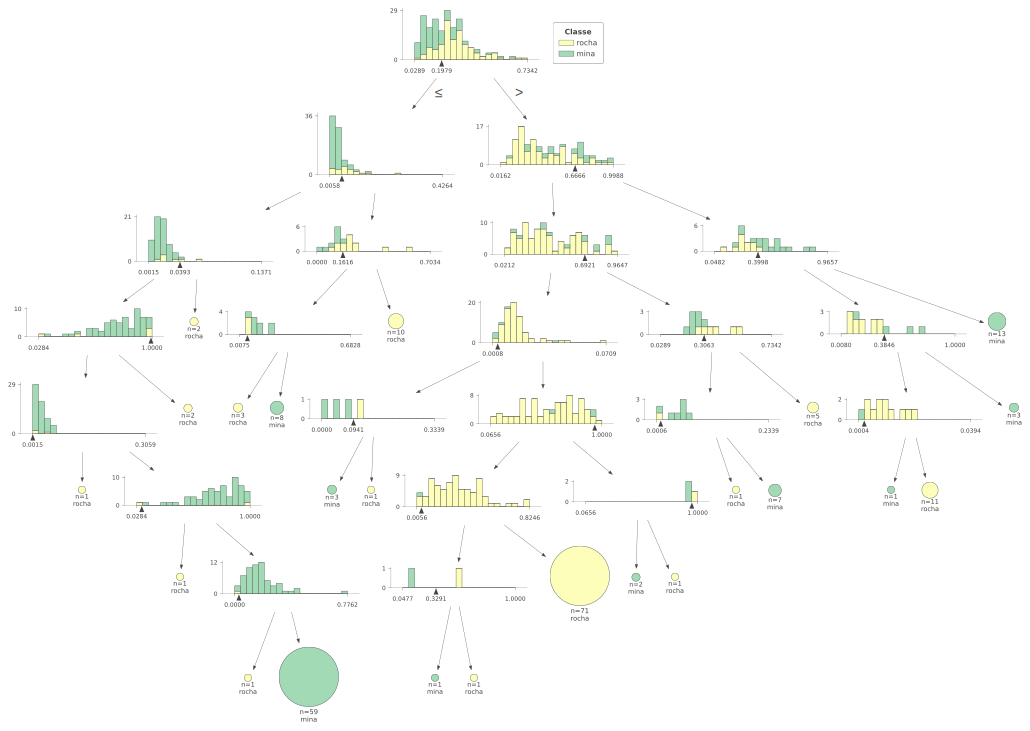

In [27]:
import dtreeviz
from dtreeviz.trees import *

viz = dtreeviz.model(
    sonar_tree,
    X_train,
    y_train,
    target_name = "Classe",
    class_names=["rocha", "mina"]
)
viz.view()

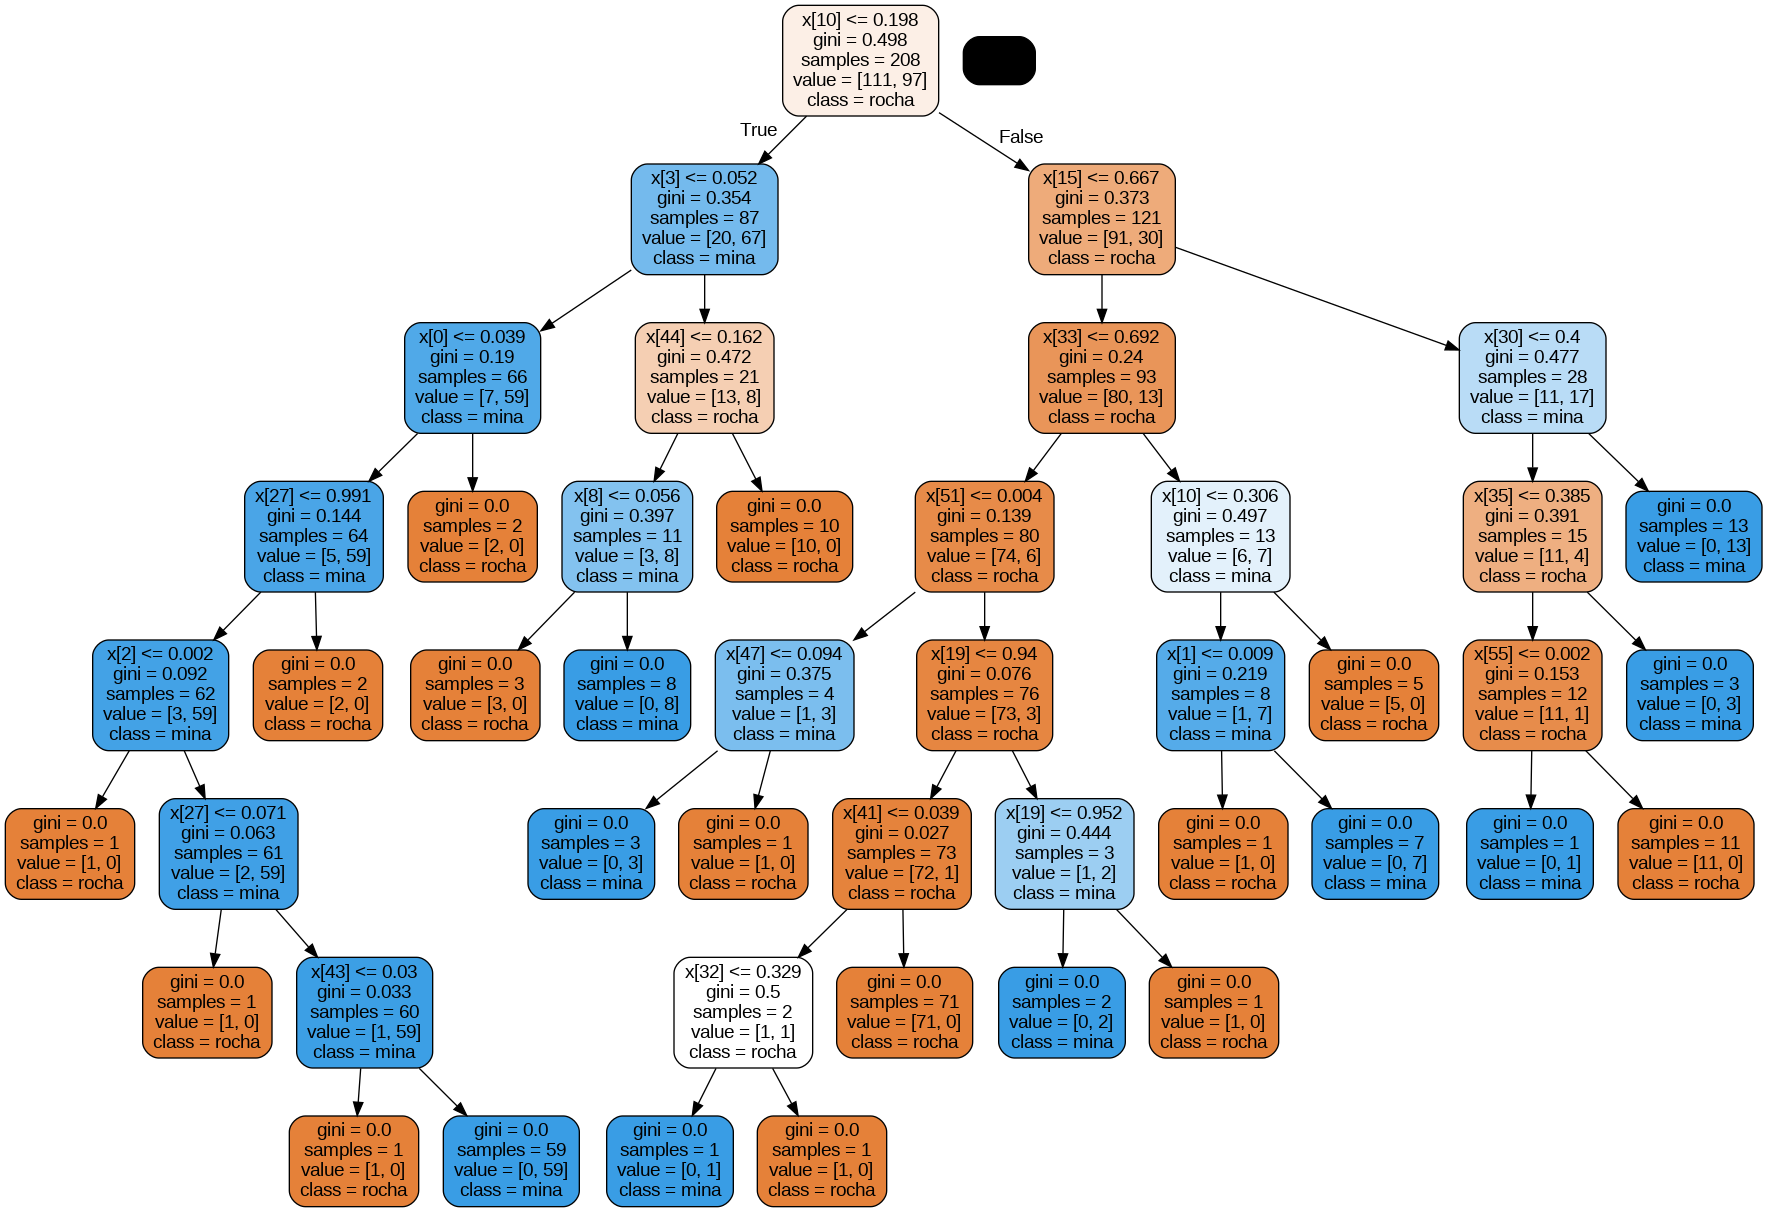

In [29]:
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(
    sonar_tree,
    out_file=None,
    rounded=True,
    filled=True,
    class_names=["rocha","mina"]
)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

É possível visualizar que a árvore possui overfitting, pois ela possui vários nós folha contendo apenas um sample.

# Classificação com particionamento entre Treino e Teste

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train = sonar.iloc[:, 0:(sonar.shape[1] - 1)]
le = LabelEncoder()
y_train = le.fit_transform(sonar.iloc[:, (sonar.shape[1] - 1)])
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=0) # Default: 75% treinamento, 25% teste

In [33]:
sonar_tree = DecisionTreeClassifier(random_state=0)
sonar_tree = sonar_tree.fit(X_train, y_train)
print("Acurácia: ", sonar_tree.score(X_train, y_train))

Acurácia:  1.0


In [35]:
Train_predict = sonar_tree.predict(X_test)
print("Acurácia de Previsão: ", accuracy_score(y_test, Train_predict))
print(classification_report(y_test, Train_predict)) # Relatório mais preciso do modelo utilizando o y_test

Acurácia de Previsão:  0.8076923076923077
              precision    recall  f1-score   support

           0       0.79      0.85      0.81        26
           1       0.83      0.77      0.80        26

    accuracy                           0.81        52
   macro avg       0.81      0.81      0.81        52
weighted avg       0.81      0.81      0.81        52



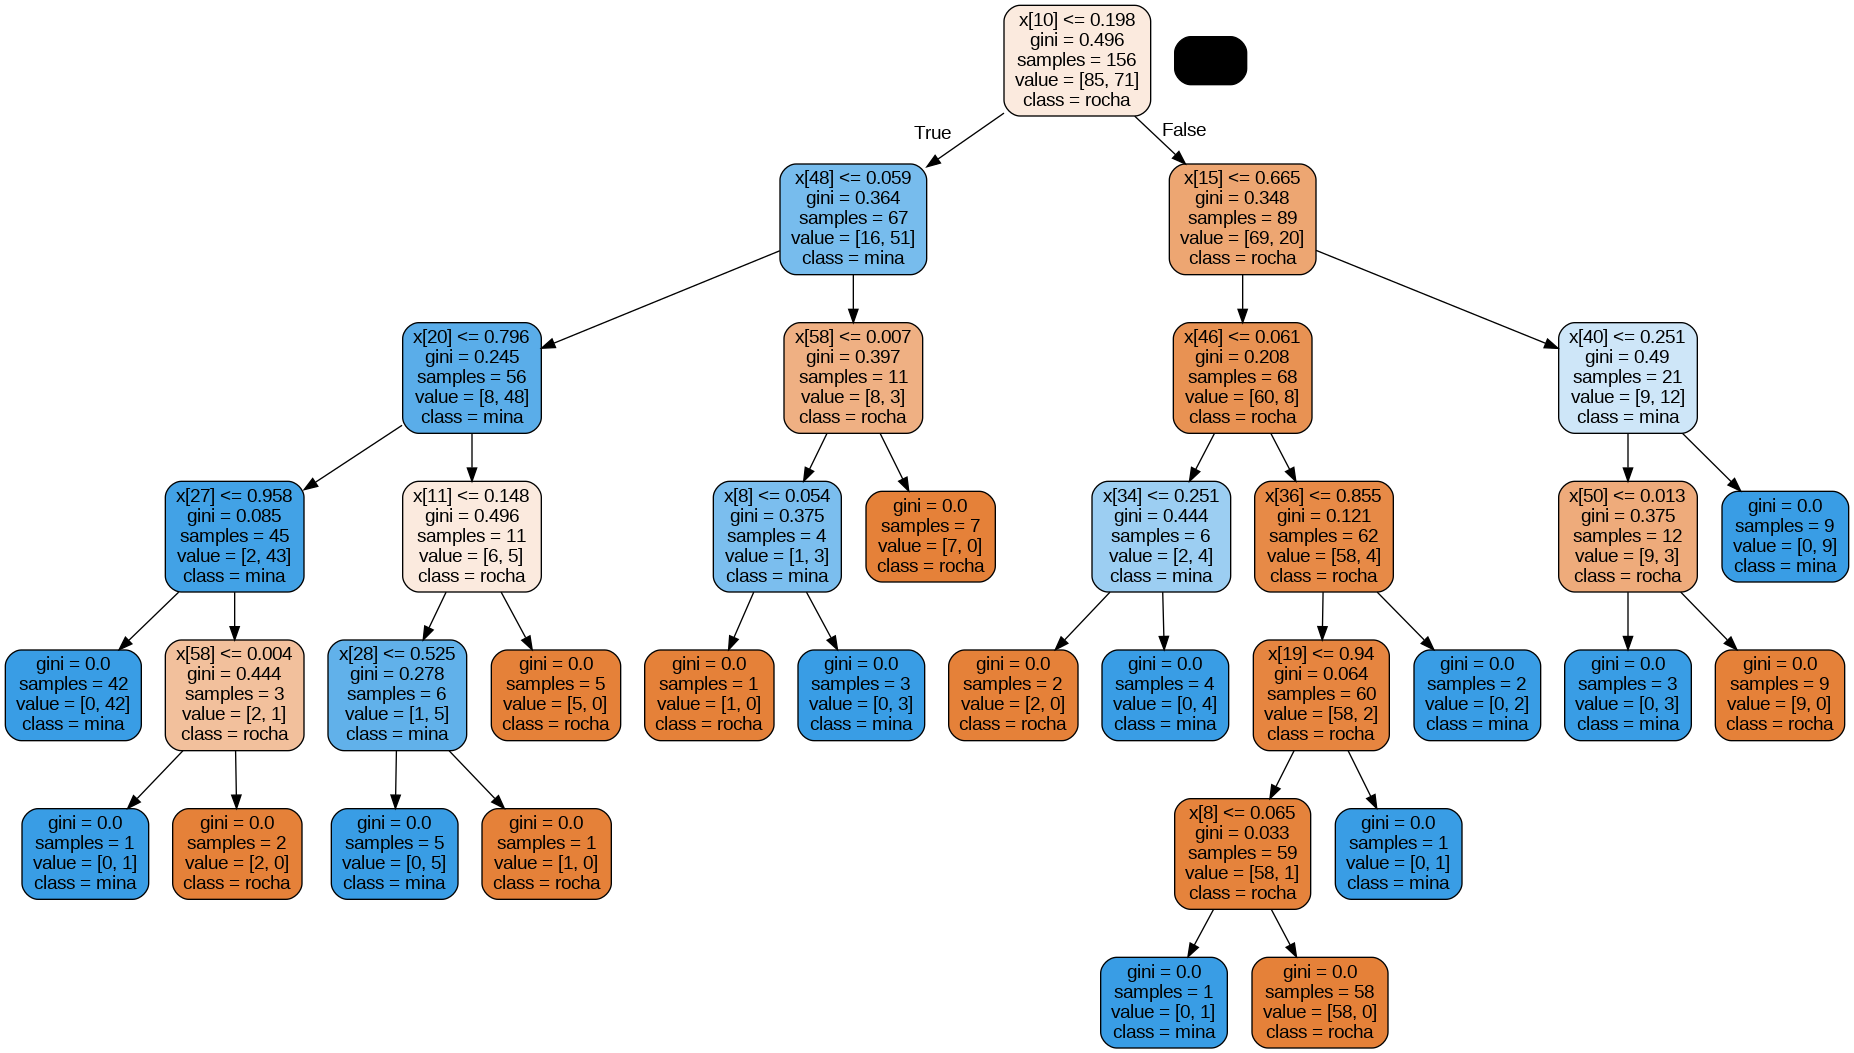

In [36]:
dot_data = tree.export_graphviz(
    sonar_tree,
    out_file=None,
    rounded=True,
    filled=True,
    class_names=["rocha","mina"]
)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())